## 2022 Predict Ideology Score for TESTING

In [25]:
from fastai.text.all import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
transformers.utils.logging.set_verbosity(40) 

In [4]:
from ideology_utils import *

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **group** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.

In [5]:
group = Path('tweets/tweets-colleges-2022')

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [ ]:
#group = get_tweets_of_group("handles_media.csv", "media")

### Ideology of a Select Group using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [20]:
trainer,tokz = load_tfms_model()

In [21]:
score_tfms('tweets/TheRealGOP.json',[trainer, tokz])

['TheRealGOP', 0.67, 0.65, 1000]


['TheRealGOP', 0.67, 0.65, 1000]

In [22]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['mit', 0.35, 0.34, 500]
['vanderbiltu', 0.49, 0.49, 500]
['HowardU', 0.2, 0.23, 499]
['tcu', 0.59, 0.56, 500]
['asu', 0.34, 0.35, 500]
['johnshopkins', 0.27, 0.29, 500]
['princeton', 0.5, 0.5, 500]
['OberlinCollege', 0.27, 0.29, 499]
['WoosterEdu', 0.37, 0.4, 500]
['iupedu', 0.42, 0.43, 500]
['miamiuniversity', 0.68, 0.68, 500]
['UHouston', 0.32, 0.35, 500]
['iupui', 0.32, 0.34, 500]
['uakron', 0.4, 0.42, 500]
['BoiseState', 0.81, 0.81, 496]
['NavalAcademy', 0.59, 0.56, 500]
['harvard', 0.39, 0.38, 500]
['LawrenceUni', 0.33, 0.35, 500]
['uarkansas', 0.95, 0.94, 498]
['northwesternu', 0.26, 0.28, 500]
['UNCCharlotte', 0.19, 0.25, 500]
['UofAlabama', 0.58, 0.57, 500]
['WabashCollege', 0.74, 0.74, 500]
['AmericanU', 0.25, 0.28, 500]
['butleru', 0.52, 0.51, 500]
['KenyonCollege', 0.36, 0.38, 500]
['syracuseu', 0.3, 0.34, 499]
['UChicago', 0.29, 0.3, 500]
['denisonu', 0.27, 0.3, 500]
['usc', 0.31, 0.33, 500]
['indianastate', 0.75, 0.74, 500]
['uiowa', 0.69, 0.66, 497]
['Gwtweets', 0.39, 0.

In [23]:
df = scores2df(scores_tfms,'s1')

### Ideology of Select Colleges using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.
**0 is Progressive, 1 is Conservative**

<AxesSubplot:ylabel='handle'>

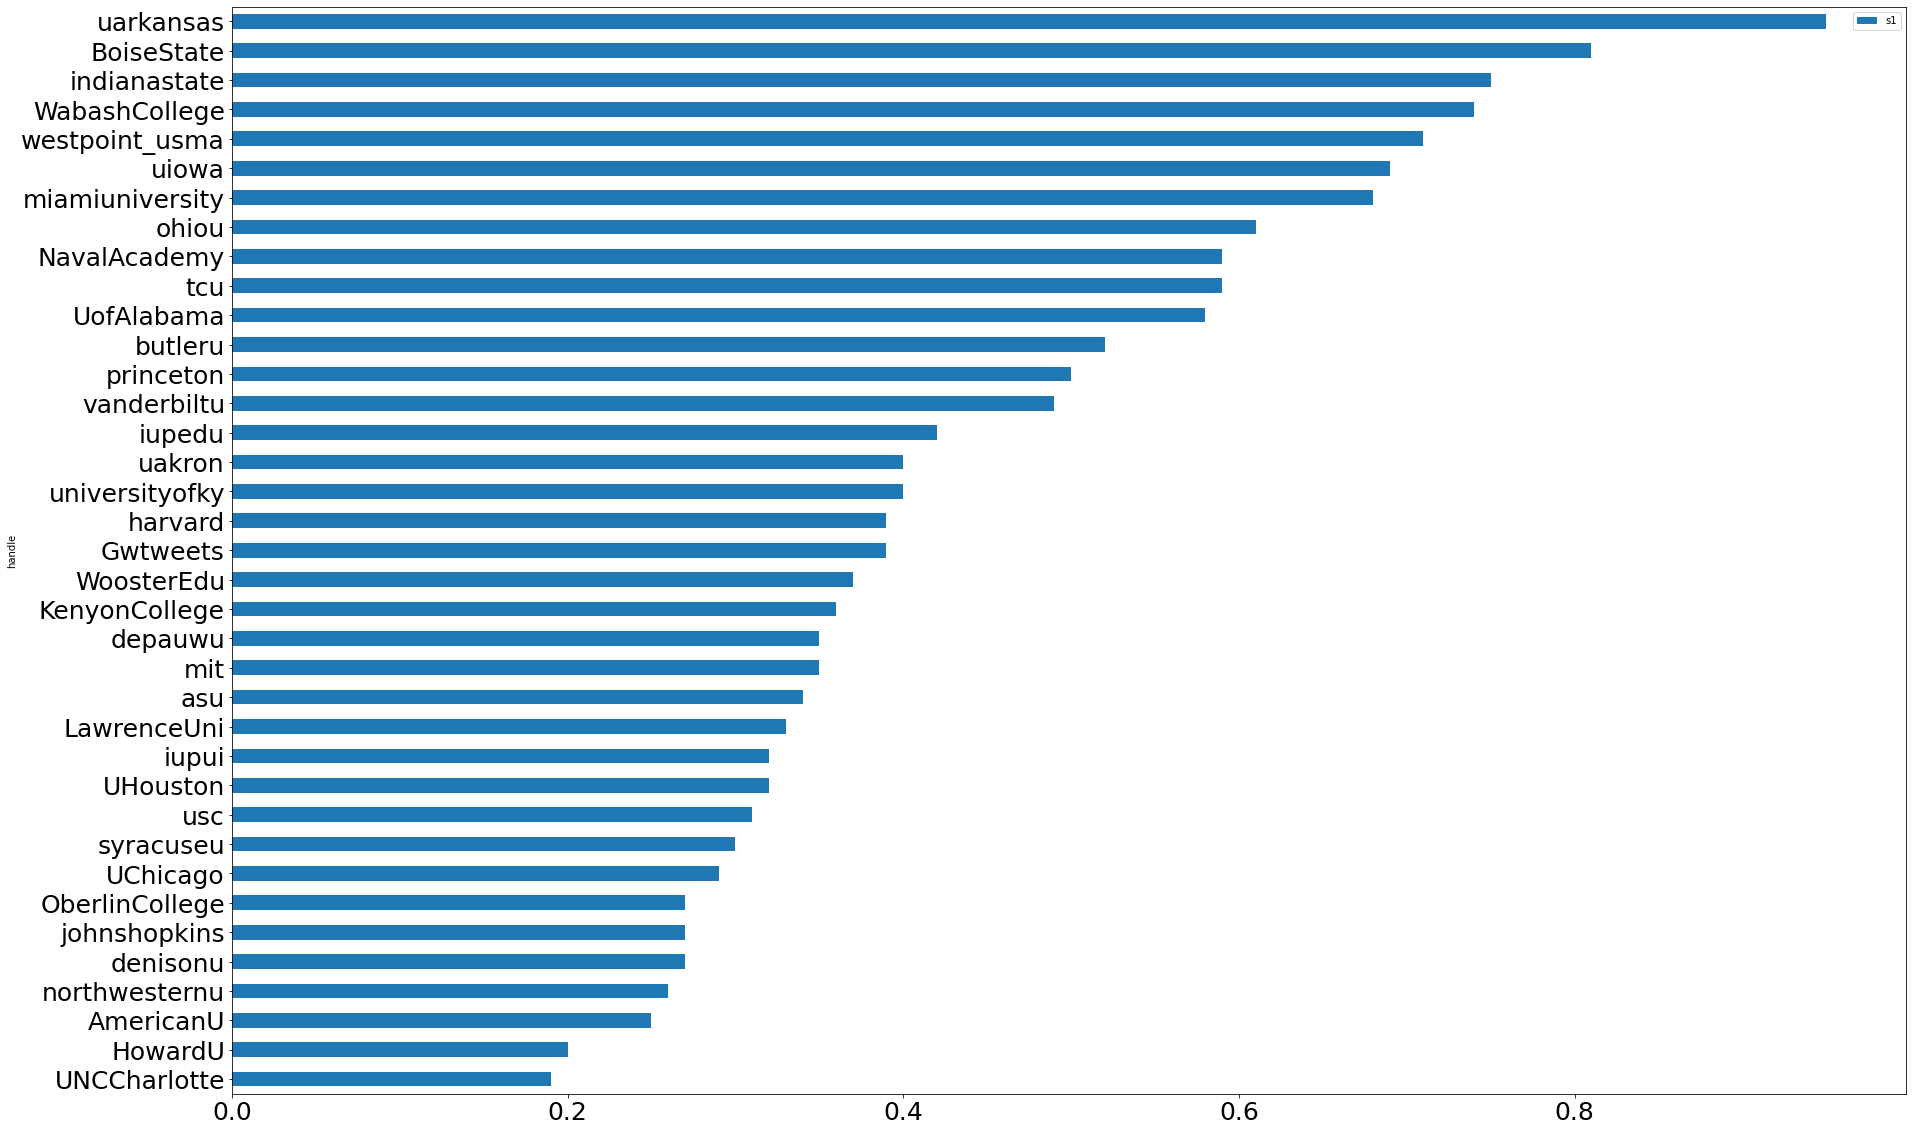

In [24]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)